In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# 数据描述

** Id **: 玩家Id

** groupId **：队伍Id

** matchId **：比赛场次Id

** assists **：被玩家伤害但是被队友杀死的敌人数目

** boosts **：玩家所用的提升装备数

** damageDealt **：玩家的伤害值（排除自残）

** DBNOs **：玩家击倒的敌人数

** headshotKills **：爆头敌人数

** heals **：玩家所用的救援物品数目

** killPlace **：所kill的敌人玩家的排名

** killPoints **：基于kill的玩家外部排名（若rankpoints不是-1，则killpoints=0视为None）

** kills **：玩家杀死的敌人数

** killStreaks **：短时间内最多kill数

** longestKill **：最长kill距离

** matchDuration **：比赛时间（秒）

** matchType **：比赛模式（单人/双人/四人...）

** maxPlace **: 该比赛场次的最差排名（没考虑中途逃跑数，>=队伍数）

** numGroups **：比赛队伍数

** rankPoints **：玩家的类Elo排名，-1代表None。（不太准确，后续版本会取消）

** revives **：玩家救援队友次数

** rideDistance **：总骑行距离（米）

** roadKills **：撞死敌人数

** swimDistance **：游泳距离（米）

** teamKills **：玩家kill队友的次数

** vehicleDestroys **：毁坏载具数

** walkDistance **：总walk距离（米）

** weaponsAcquired **：捡取的武器数

** winPoints **：仅基于win的玩家外部排名（若rankpoints不是-1，则winpoints=0视为None）

** winPlacePerc **：基于maxPlace计算的排名比例，没考虑逃跑数。预测值，1代表第一名，0代表最后一名

In [3]:
train = pd.read_csv("train_V2.csv")

# EDA 

In [4]:
train.shape

(4446966, 29)

### 重复值 

查看是否有重复记录 

In [5]:
train.duplicated().any()

False

没有重复记录，不需删除

### 缺失值 

In [6]:
train.isnull().any()

Id                 False
groupId            False
matchId            False
assists            False
boosts             False
damageDealt        False
DBNOs              False
headshotKills      False
heals              False
killPlace          False
killPoints         False
kills              False
killStreaks        False
longestKill        False
matchDuration      False
matchType          False
maxPlace           False
numGroups          False
rankPoints         False
revives            False
rideDistance       False
roadKills          False
swimDistance       False
teamKills          False
vehicleDestroys    False
walkDistance       False
weaponsAcquired    False
winPoints          False
winPlacePerc        True
dtype: bool

In [7]:
train.apply(lambda x:sum(x.isnull()))

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

winPlacePerc有极少量缺失值，删除该条记录

In [8]:
train[np.isnan(train['winPlacePerc'])] [['Id','winPlacePerc']]

,Id,winPlacePerc
2744604,f70c74418bb064,NaN


In [9]:
train.shape

(4446966, 29)

In [10]:
train = train.dropna().reset_index(drop=True)
train.shape

(4446965, 29)

###  总体信息

In [11]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [12]:
original_cols = train.columns

In [13]:
train.ftypes

Id                  object:dense
groupId             object:dense
matchId             object:dense
assists              int64:dense
boosts               int64:dense
damageDealt        float64:dense
DBNOs                int64:dense
headshotKills        int64:dense
heals                int64:dense
killPlace            int64:dense
killPoints           int64:dense
kills                int64:dense
killStreaks          int64:dense
longestKill        float64:dense
matchDuration        int64:dense
matchType           object:dense
maxPlace             int64:dense
numGroups            int64:dense
rankPoints           int64:dense
revives              int64:dense
rideDistance       float64:dense
roadKills            int64:dense
swimDistance       float64:dense
teamKills            int64:dense
vehicleDestroys      int64:dense
walkDistance       float64:dense
weaponsAcquired      int64:dense
winPoints            int64:dense
winPlacePerc       float64:dense
dtype: object

In [14]:
train['matchType'].head()

0    squad-fpp
1    squad-fpp
2          duo
3    squad-fpp
4     solo-fpp
Name: matchType, dtype: object

类别变量数值化处理：labelEncoder + OneHotEncoder

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder().fit(train['matchType'])
oe = OneHotEncoder(sparse=False).fit(le.transform(train['matchType']).reshape(-1,1))

In [16]:
matchType_new = oe.transform(le.transform(train['matchType']).reshape(-1,1))

In [17]:
new = pd.DataFrame(matchType_new,columns=['matchType_'+str(i) for i in range(matchType_new.shape[1])])

In [18]:
new.shape

(4446965, 16)

### 删除某些列 

In [19]:
train.drop(['matchType','killPoints','winPoints','rankPoints'],axis=1,inplace=True)
train.shape

(4446965, 25)

In [20]:
c1 = train.columns
c2 = new.columns

In [21]:
train = pd.concat([train,new],axis=1)
train.columns = list(c1)+list(c2)
train.shape

(4446965, 41)

In [22]:
train.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,matchType_6,matchType_7,matchType_8,matchType_9,matchType_10,matchType_11,matchType_12,matchType_13,matchType_14,matchType_15
4446960,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4446961,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4446962,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4446963,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4446964,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,...,matchType_6,matchType_7,matchType_8,matchType_9,matchType_10,matchType_11,matchType_12,matchType_13,matchType_14,matchType_15
count,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,...,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06,4.446965e+06
mean,2.338150e-01,1.106908e+00,1.307172e+02,6.578757e-01,2.268196e-01,1.370148e+00,4.759936e+01,9.247835e-01,5.439553e-01,2.299760e+01,...,4.474962e-05,1.234325e-03,7.330842e-05,3.782355e-04,1.160342e-04,3.861960e-03,4.091397e-02,1.207028e-01,1.408884e-01,3.949179e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746293e+01,1.558445e+00,7.109721e-01,5.097262e+01,...,6.689367e-03,3.511128e-02,8.561721e-03,1.944460e-02,1.077129e-02,6.202456e-02,1.980910e-01,3.257816e-01,3.479065e-01,4.888331e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.000000e+00,1.000000e+00,2.132000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,7.200000e+01,2.000000e+01,1.094000e+03,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## 单变量分析 

###  Id

In [24]:
train['Id'].duplicated().any()

False

无重复Id

### groupId 

In [25]:
train['groupId'].duplicated().any()

True

In [26]:
from collections import Counter
Counter(train['groupId'])

Counter({'03c147c458583d': 3,
         '09a3b4c561c892': 2,
         '6beacaf09ac2d1': 1,
         '76b994de052c67': 3,
         'c69a17fdd0f022': 7,
         '21fe8c311e30b0': 2,
         '0f2a2127552537': 1,
         '0693c8e979227a': 1,
         'e83687f7a911b6': 1,
         '419de24077c968': 4,
         '69ad90857fc3ef': 1,
         'b725effda41182': 2,
         'e625ccf1c62052': 1,
         'cff5dbc8deb25e': 1,
         '14b7410acfacac': 1,
         'dd11eea6ebb06c': 1,
         'f16aa7ce4eff1f': 1,
         'c82cce4213920a': 4,
         '4e66f7c1a68752': 3,
         'ad282239861d1f': 1,
         'dc60aec52899c4': 2,
         'fb7bfe48ffef82': 1,
         '5980298a080d30': 2,
         '9404f4b769edfd': 2,
         '1d4247b534f7c3': 2,
         'e02aa62d8b0d3a': 1,
         'a2d567e8abd126': 3,
         '5089e7760f4fe0': 2,
         'aa14bbc73f9061': 2,
         'bf3b78100e24ea': 2,
         'f1855fbbef43cc': 4,
         'd083ee06332873': 2,
         'b91e167ba2f4bf': 2,
         '

In [27]:
train[train['groupId'] == '79faae3307ff98'][['winPlacePerc','matchDuration']]

,winPlacePerc,matchDuration
853711,0.6923,1921
1560198,0.6923,1921
2120924,0.6923,1921
3843217,0.6923,1921


由上可知，预测的winPlacePerc/matchDuration是以队伍为单位的排名。

### matchId

In [28]:
train['matchId'].duplicated().any()

True

In [29]:
Counter(train['matchId'])

Counter({'a6b299b8ab5bcf': 97,
         '79e1c220a0a6f3': 97,
         'fe3977c44879a6': 97,
         '0a724b6d7e72a2': 94,
         'eecb997372e372': 90,
         '0087d93e5e9c20': 94,
         '054daeee2a50f2': 93,
         '676e2d501fa726': 98,
         '67e669fb4d0512': 95,
         '32a13f350d660f': 95,
         '457fe06cb48113': 93,
         '12f0b3444717c3': 96,
         'be74945b3669dc': 44,
         'fd8b1af58a4dd5': 95,
         'b55f4ba8f9a7a0': 100,
         '9248775f2c8452': 94,
         '95653ca07bd818': 98,
         '4b23082e6060a7': 93,
         'c65248c240fc36': 91,
         '00a4afdb911815': 89,
         'd17f0e7ff1652c': 95,
         'a6a205984d71c0': 98,
         '22d1062ce66ef7': 94,
         '207d711d68517a': 97,
         '6118b1eaeea0d5': 92,
         'ef295f3f9d109a': 91,
         '50d7ff9634b1e8': 96,
         '122da6ef63f931': 97,
         '0d05824ffb1f3b': 93,
         'e06cbeea1d488d': 96,
         'dc7c3473edeab4': 95,
         'b6557368dc965a': 96,
       

可知获取数据的方式应该是以match为单位，这样也是相对合理的。

### assists等其他数值型变量 

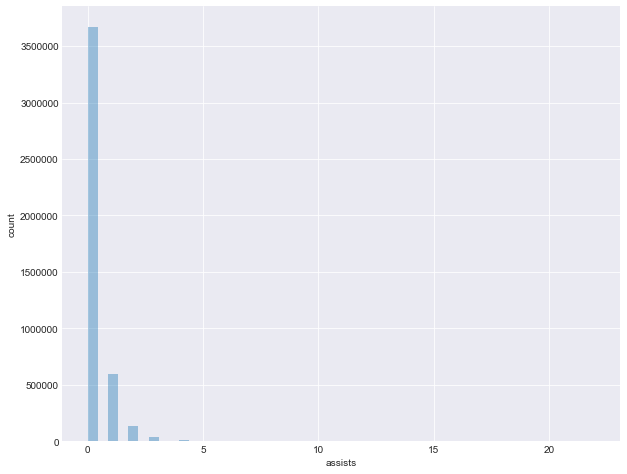

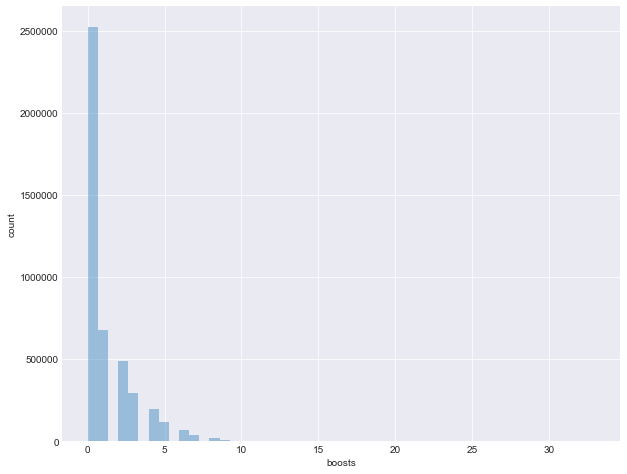

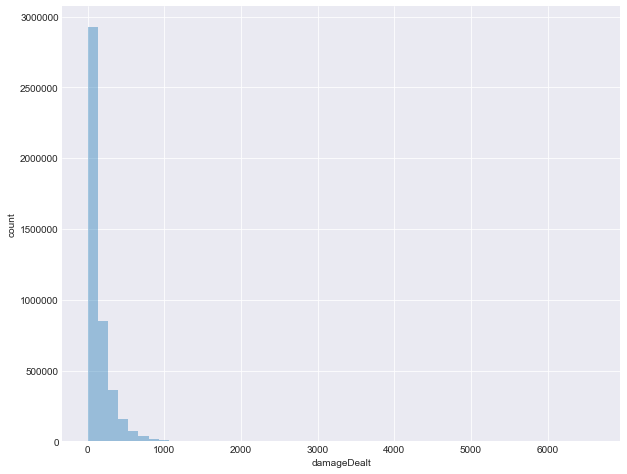

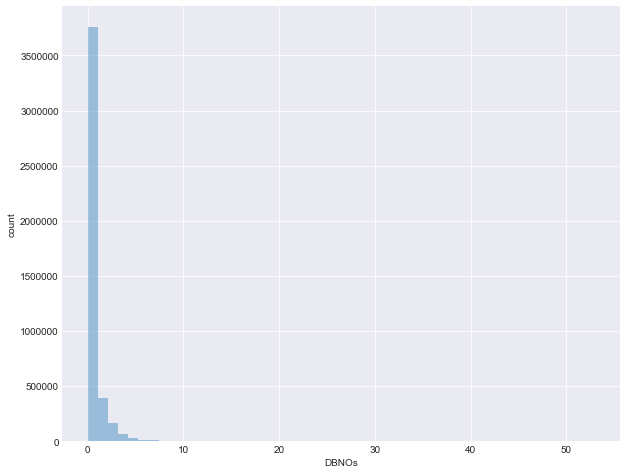

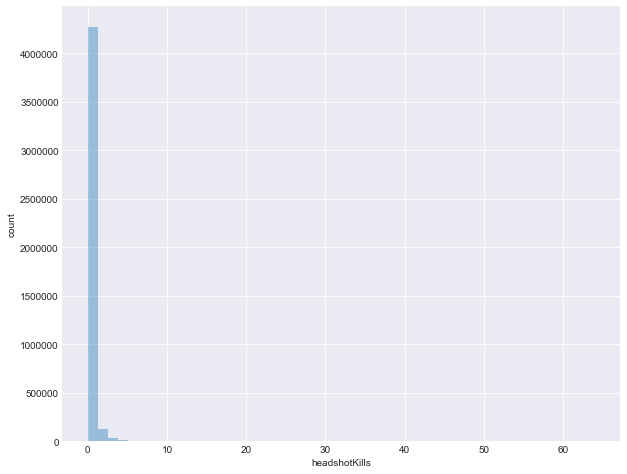

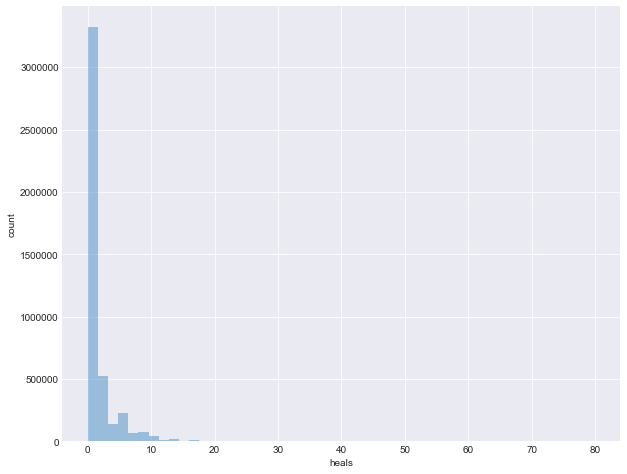

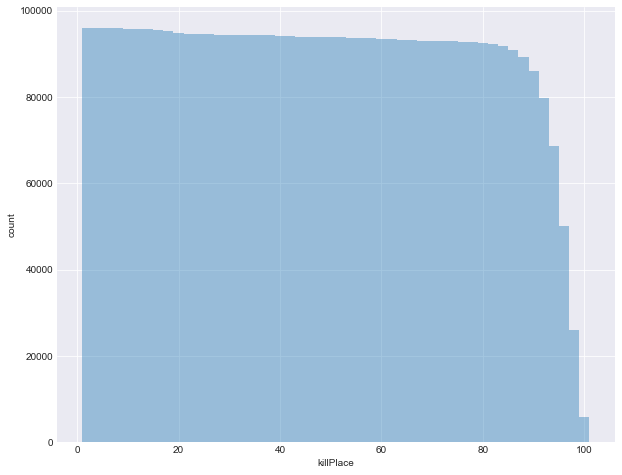

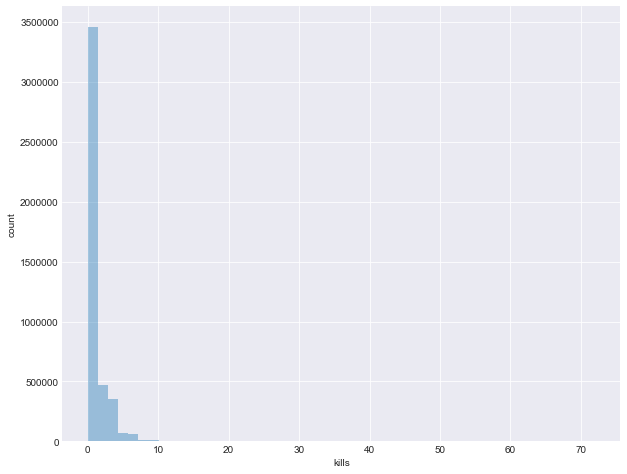

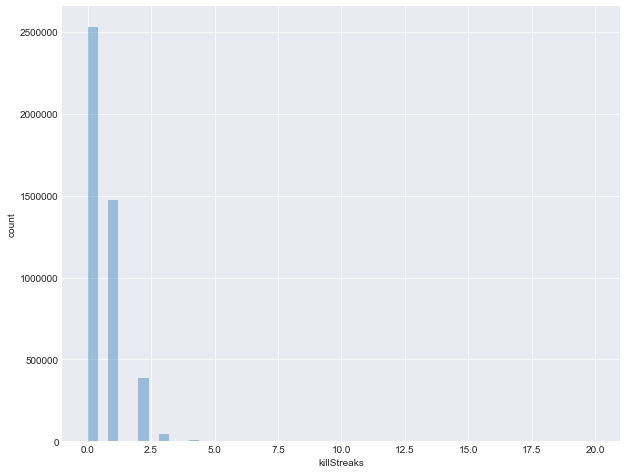

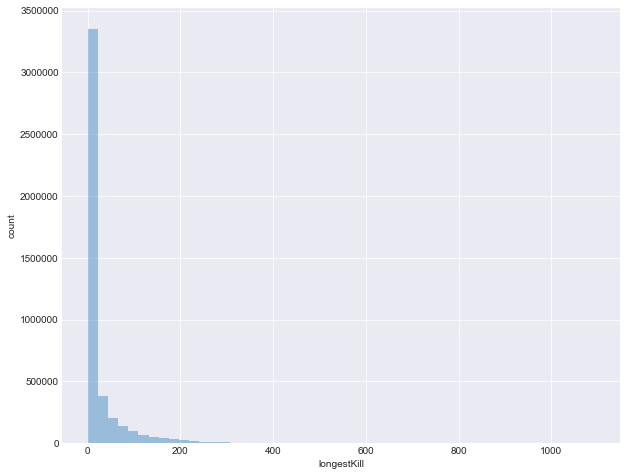

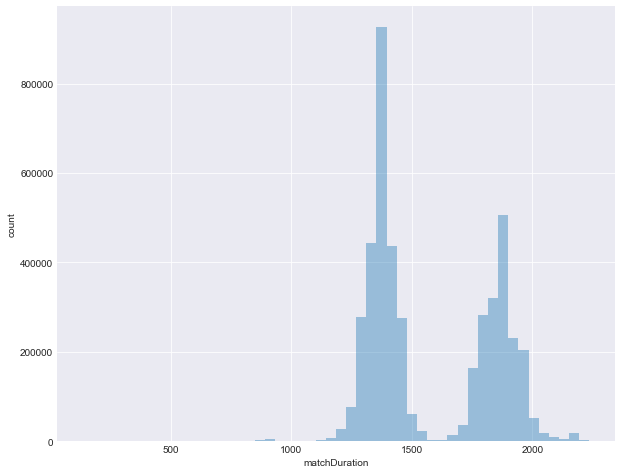

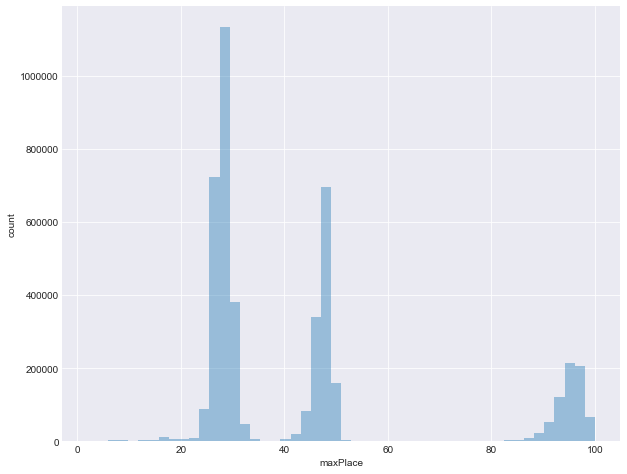

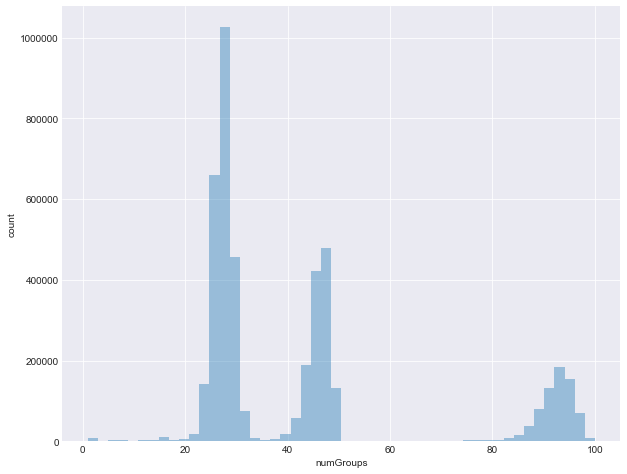

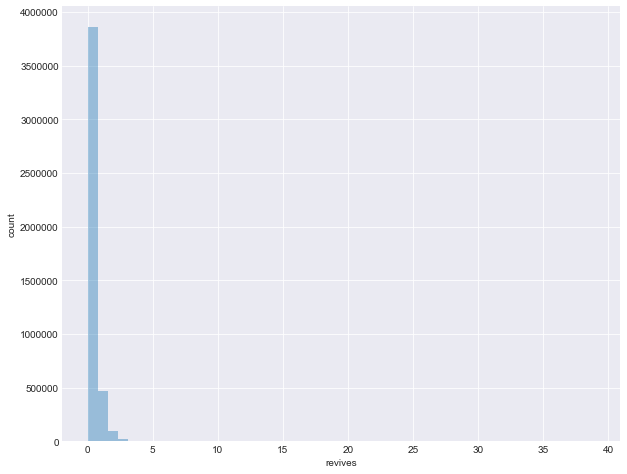

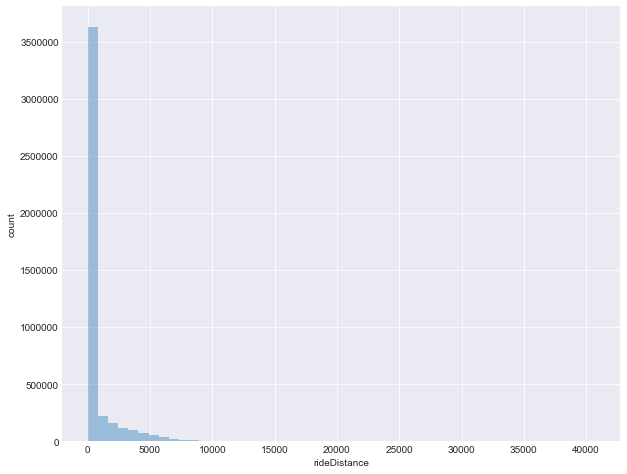

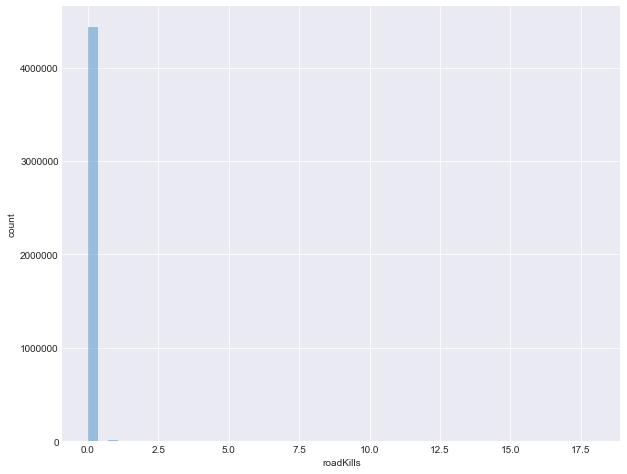

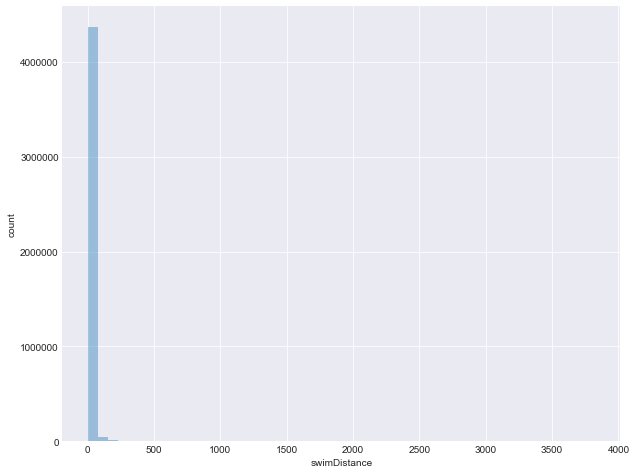

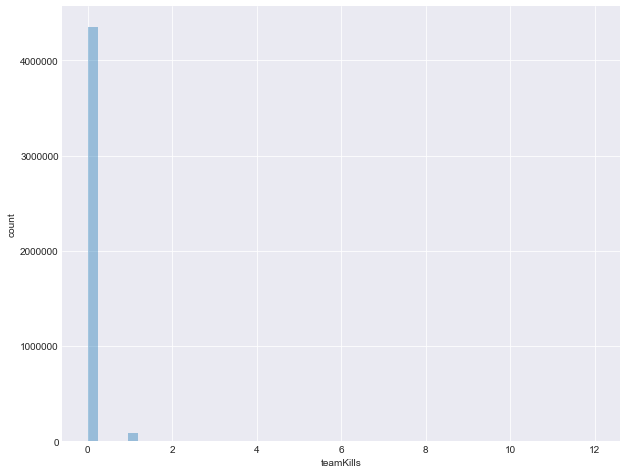

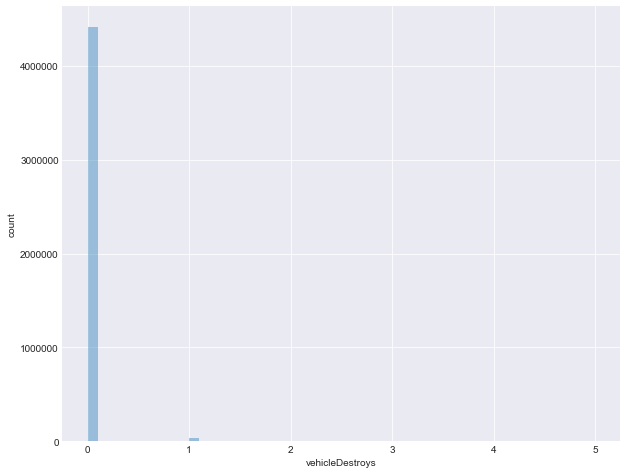

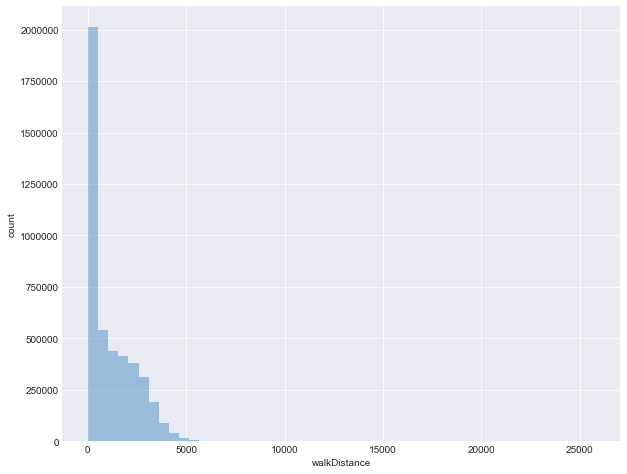

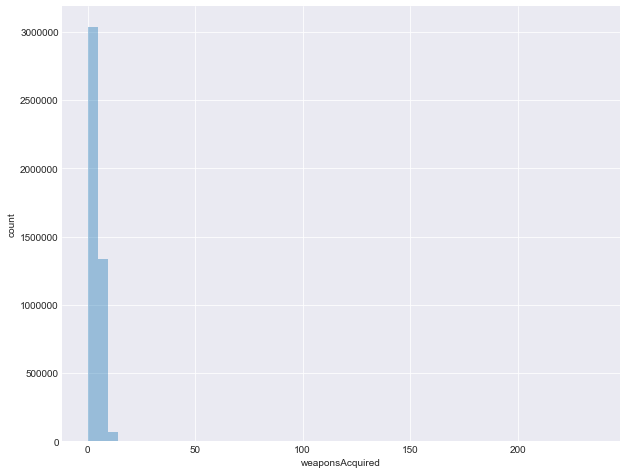

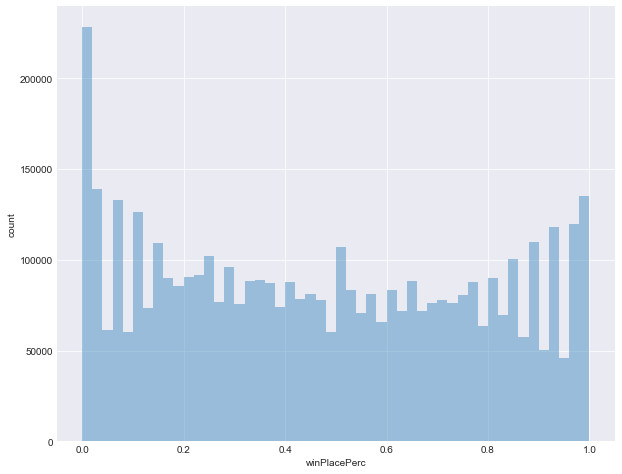

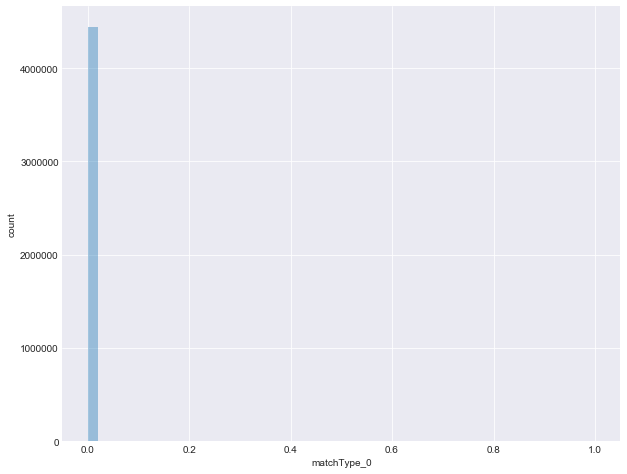

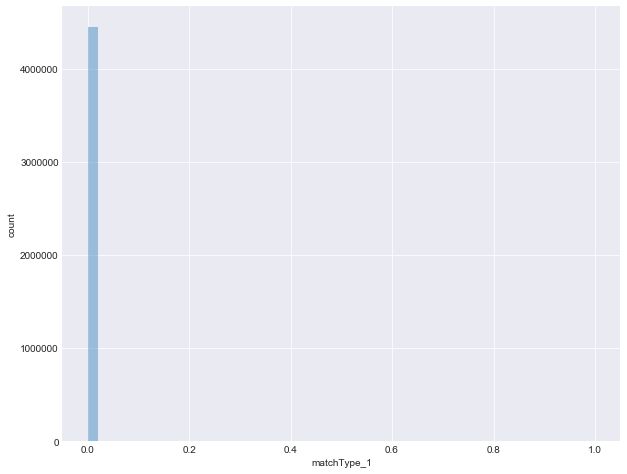

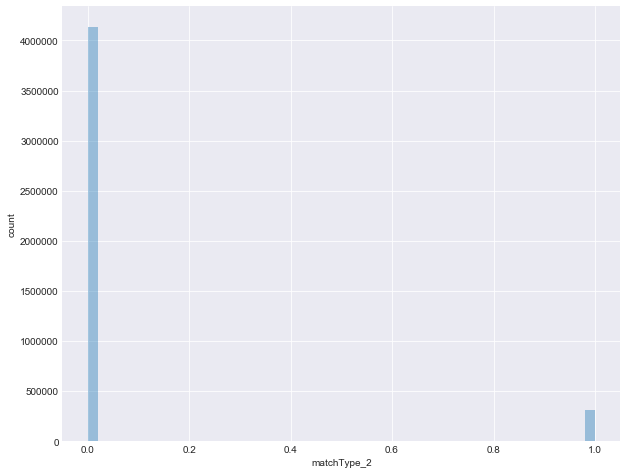

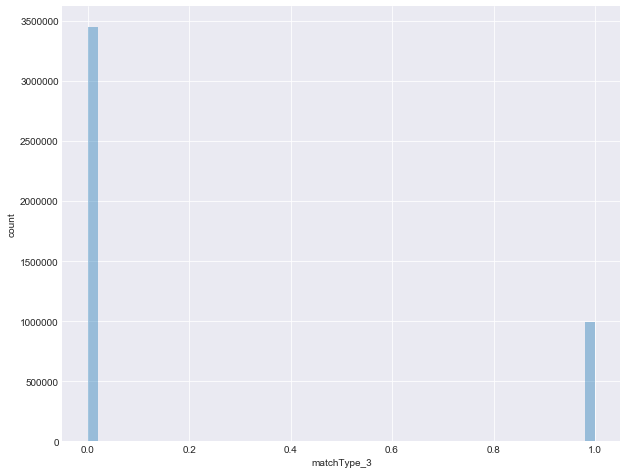

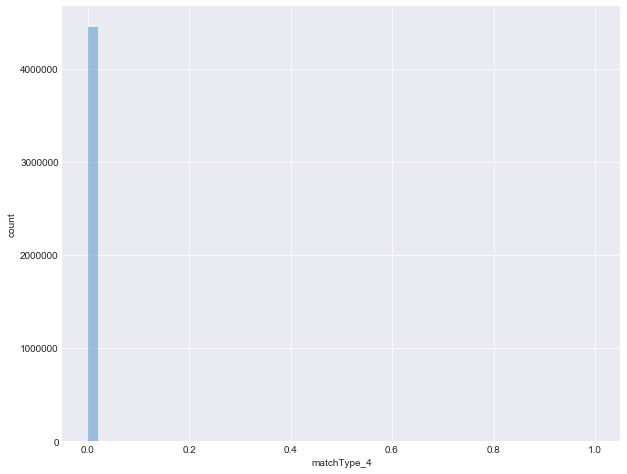

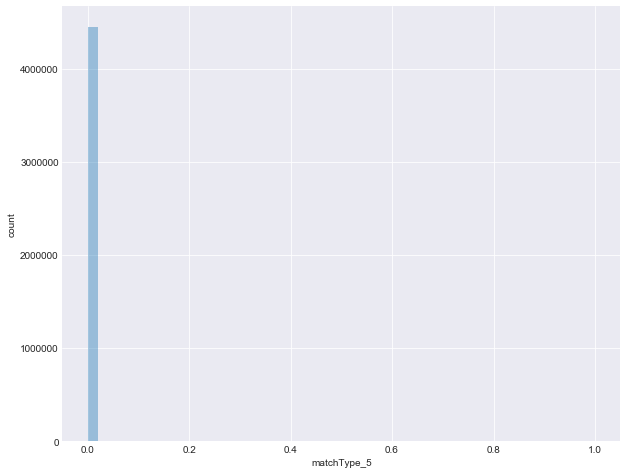

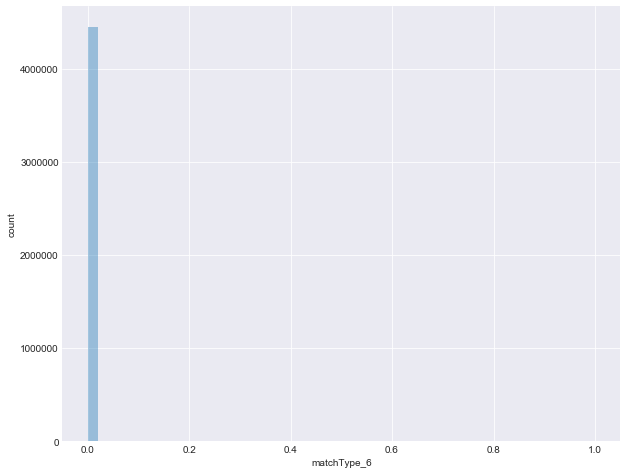

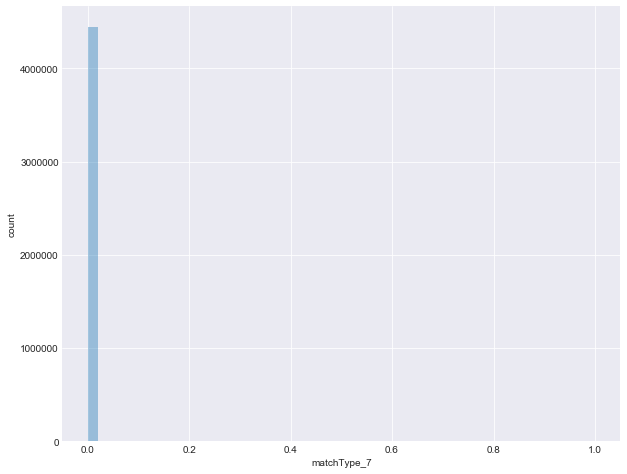

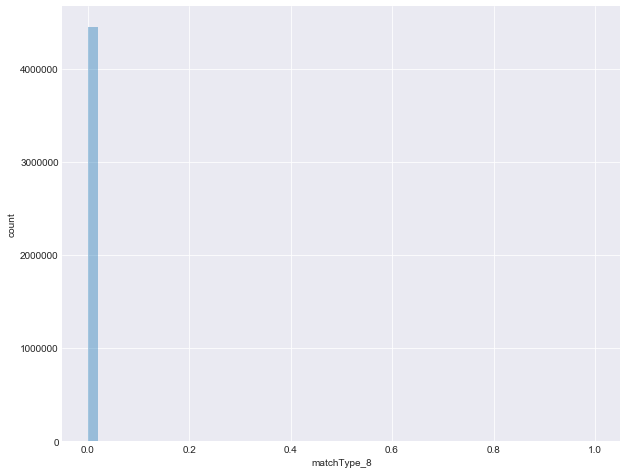

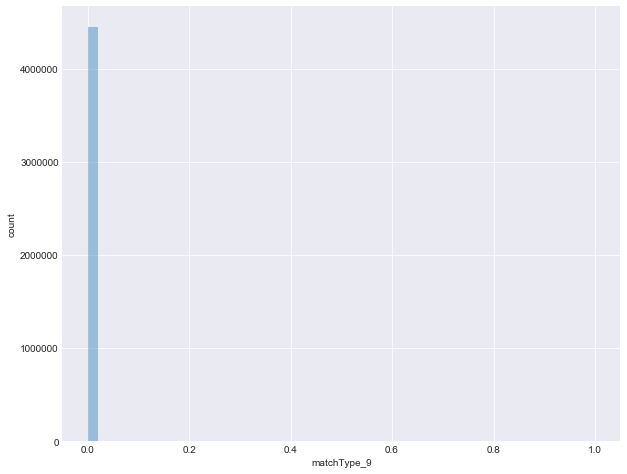

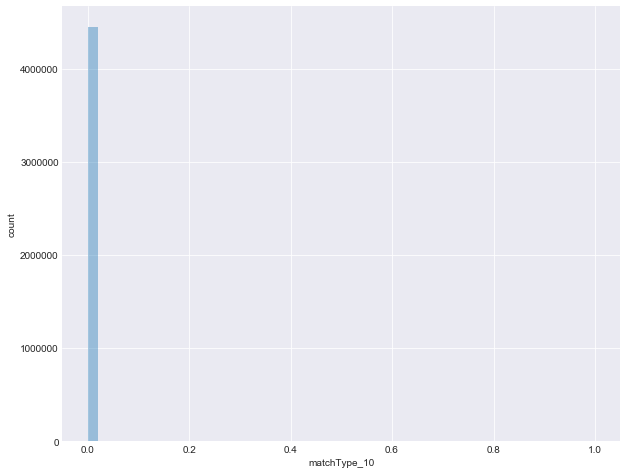

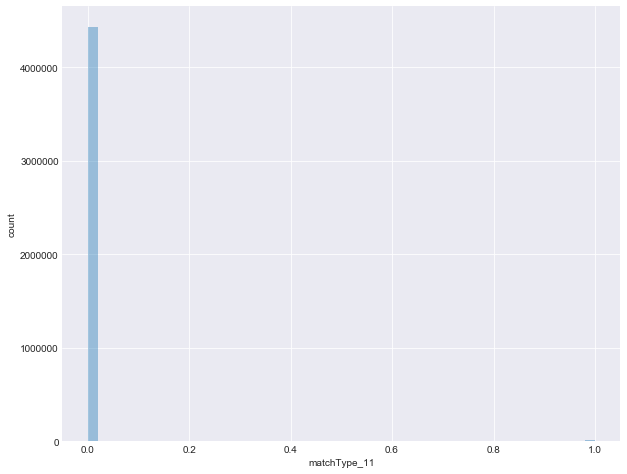

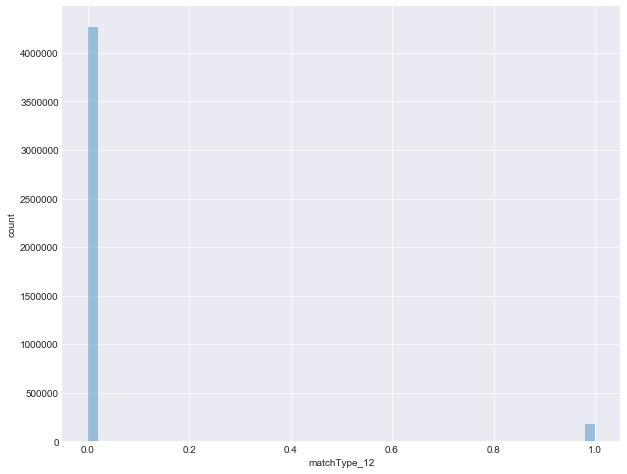

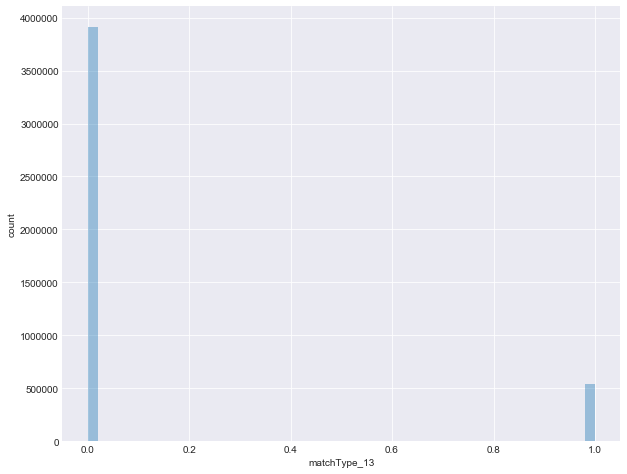

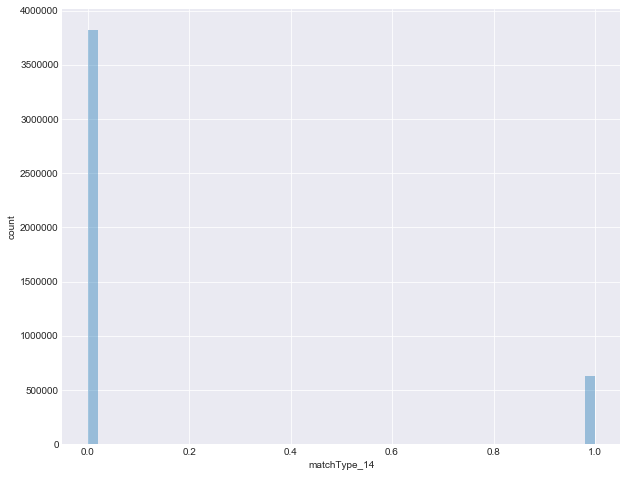

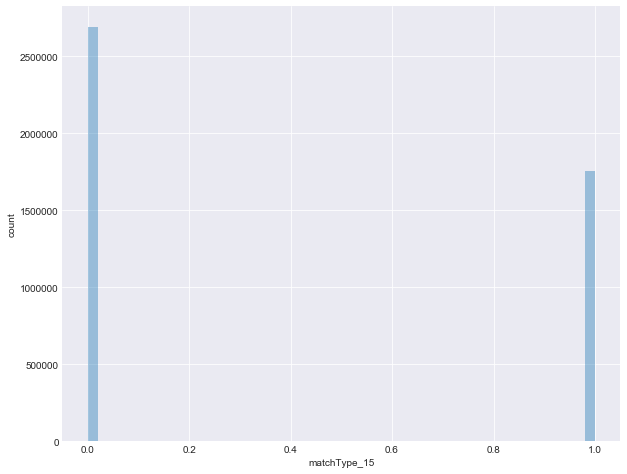

In [30]:
with sns.axes_style("darkgrid"):
    for value in train.columns[3:]:
        plt.figure(figsize=(10,8))
        sns.distplot(train[value],kde=False)
        plt.xlabel(value)
        plt.ylabel('count')
        plt.show()

# 模型训练 

预测目标是回归变量，可以先用决策树、RF、adaboost、GBDT、xgboost作训练

## 决策树 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
now = time.time()
dt = DecisionTreeRegressor(criterion='mae')
param = {
    'max_depth':range(1,10),
    'min_samples_split':range(2,100,20),
    'min_samples_leaf':range(1,50,5)
}